## Загрузка и первичный анализ данных

Для выполнения задания был выдан датасет с данными о ресторанах города Сан-Франциско

https://www.kaggle.com/datasets/san-francisco/sf-restaurant-scores-lives-standard


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

data = pd.read_csv('restaurant-scores-lives-standard.csv', sep=",")
data.shape
data.dtypes

business_id                    int64
business_name                 object
business_address              object
business_city                 object
business_state                object
business_postal_code          object
business_latitude            float64
business_longitude           float64
business_location             object
business_phone_number        float64
inspection_id                 object
inspection_date               object
inspection_score             float64
inspection_type               object
violation_id                  object
violation_description         object
risk_category                 object
Neighborhoods (old)          float64
Police Districts             float64
Supervisor Districts         float64
Fire Prevention Districts    float64
Zip Codes                    float64
Analysis Neighborhoods       float64
dtype: object

In [3]:
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.shape

(53973, 23)

Проверим есть ли пропущенные значения

In [9]:
data.isnull().sum()

business_id                      0
business_name                    0
business_address                 0
business_city                    0
business_state                   0
business_postal_code          1018
business_latitude            19556
business_longitude           19556
business_location            19556
business_phone_number        36938
inspection_id                    0
inspection_date                  0
inspection_score             13610
inspection_type                  0
violation_id                 12870
violation_description        12870
risk_category                12870
Neighborhoods (old)          19594
Police Districts             19594
Supervisor Districts         19594
Fire Prevention Districts    19646
Zip Codes                    19576
Analysis Neighborhoods       19594
dtype: int64

## Обработка пропусков в данных

1) Обработка категориальных значений

В качестве категориальных данных был выбран столбец risk_category. Поскольку данный признак позволяет оценить предпринимателям уровень безопасности сострудничества с организацией,то имеет смысл попробовать заполнить пропуски с помощью встроенных средства импьютации библиотеки scikit-learn, чем просто удалить данный столбец из датасета. Тем более, что число пропущенных данных составляет всего 24% от общего числа строк.

In [20]:
risk_cat_data = data[['risk_category']]
risk_cat_data

,risk_category
0,NaN
1,Moderate Risk
2,NaN
3,NaN
4,High Risk
...,...
53968,Moderate Risk
53969,NaN
53970,Moderate Risk
53971,Moderate Risk


In [22]:
risk_cat_data['risk_category'].unique()

array([nan, 'Moderate Risk', 'High Risk', 'Low Risk'], dtype=object)

В данном случае, считаю, что наиболее грамотно было бы заполнить пропущенные значения константами "Moderate Risk". Так пользователи обратят внимание на возможность риска.

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
# Импьютация константой
imputer1 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Moderate Risk')
full_risk_data = imputer1.fit_transform(risk_cat_data)
full_risk_data

array([['Moderate Risk'],
       ['Moderate Risk'],
       ['Moderate Risk'],
       ...,
       ['Moderate Risk'],
       ['Moderate Risk'],
       ['Low Risk']], dtype=object)

In [24]:
full_risk_data.shape

(53973, 1)

Убедимся, что пустые значения отсутствуют

In [25]:
np.unique(full_risk_data)

array(['High Risk', 'Low Risk', 'Moderate Risk'], dtype=object)

Теперь заменим в data столбец risk_category новым стольбцом без пропусков. Для этого удалим старый столбец и вставим новый.

In [29]:
data.drop(['risk_category'], axis = 1)
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data['risk_category'] = full_risk_data.reshape(-1)
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


2) Обработка количественных значений

В качестве количественных данных был выбран столбец inspection_score. Этот столбец не стоит удалять из датасета, поскольку он информирует пользователей о том, на сколько соответствует ресторан требованиям проведенной проверки. Пропущенные данные в этом столбце буду заполнять значениями медианы, тк неизвестное оценочное числовое значение можно взять в середине диапазона известных значений.

In [37]:
inspection_score_data = data[['inspection_score']]
inspection_score_data

,inspection_score
0,NaN
1,96.0
2,NaN
3,NaN
4,NaN
...,...
53968,80.0
53969,NaN
53970,92.0
53971,76.0


In [42]:
np.unique(inspection_score_data)

array([ 45.,  46.,  48.,  51.,  54.,  55.,  57.,  58.,  59.,  60.,  61.,
        62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
        73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
        84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,
        96.,  98., 100.,  nan])

In [44]:
# Импьютация медианой
imputer2 = SimpleImputer(missing_values=np.nan, strategy='median')
full_inspection_score = imputer2.fit_transform(inspection_score_data)
full_inspection_score

array([[87.],
       [96.],
       [87.],
       ...,
       [92.],
       [76.],
       [80.]])

Убедимся, что пустые значения отсутствуют

In [41]:
np.unique(full_inspection_score)

array([ 45.,  46.,  48.,  51.,  54.,  55.,  57.,  58.,  59.,  60.,  61.,
        62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
        73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
        84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,
        96.,  98., 100.])

In [45]:
full_inspection_score.shape

(53973, 1)

Теперь заменим в data столбец inspection_score новым стольбцом без пропусков. Для этого удалим старый столбец и вставим новый.

In [48]:
data.drop(['inspection_score'], axis = 1)
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
data['inspection_score'] = full_inspection_score.reshape(-1)
data['inspection_score'].head()

0    87.0
1    96.0
2    87.0
3    87.0
4    87.0
Name: inspection_score, dtype: float64

## Дополнительное задание

Построю график "Ящик с усами (boxplot)" для оценок проверки по категориям риска.

<AxesSubplot:xlabel='inspection_score', ylabel='risk_category'>

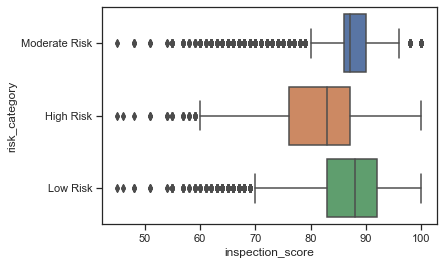

In [66]:
sns.boxplot( x=data["inspection_score"], y=data["risk_category"])